In [1]:
import scanpy as sc
import matplotlib.pyplot as plt
import moscot.plotting as mpl
import mplscience
import numpy as np
import pandas as pd
from moscot.problems.time import TemporalProblem
import seaborn as sns
import os

mplscience.available_styles()
mplscience.set_style(reset_current=True)
plt.rcParams['legend.scatterpoints'] = 1 

['default', 'despine']


In [2]:
output_dir = "/lustre/groups/ml01/workspace/moscot_paper/pancreas_revision/pancreas_2019/"

In [3]:
adata =sc.read("/lustre/groups/ml01/workspace/moscot_paper/pancreas_revision/pancreas_2019/GSE132188_adata.h5ad.h5")

/home/icb/dominik.klein/mambaforge/envs/moscot_up/lib/python3.11/site-packages/anndata/compat/__init__.py:229: FutureWarning: Moving element from .uns['neighbors']['distances'] to .obsp['distances'].

This is where adjacency matrices should go now.
  warn(
/home/icb/dominik.klein/mambaforge/envs/moscot_up/lib/python3.11/site-packages/anndata/compat/__init__.py:229: FutureWarning: Moving element from .uns['neighbors']['connectivities'] to .obsp['connectivities'].

This is where adjacency matrices should go now.
  warn(


In [4]:
adata.obs["day"] = adata.obs["day"].astype(float).astype("category")

In [5]:
adata.obs["day"].value_counts()

day
15.5    10886
12.5    10790
14.5     9633
13.5     5042
Name: count, dtype: int64

In [6]:
adata.obs["cell_type"] = adata.obs["clusters_fig6_fine_final"].copy()

In [7]:
adata.obs["cell_type"].value_counts()

cell_type
Acinar             10432
Ductal              6575
Tip                 6105
Ngn3 low EP         2616
Trunk               1838
Ngn3 High late      1732
Alpha               1428
Fev+ Beta           1359
Beta                1237
Multipotent         1225
Ngn3 High early      771
Fev+ Alpha           345
Epsilon              231
Fev+ Pyy             132
Fev+ Epsilon         112
Fev+ Delta           110
Delta                103
Other/Doublet          0
Name: count, dtype: int64

In [8]:
endocrine_cells = ["Alpha", "Beta", "Epsilon", "Delta", "Fev+ Epsilon", "Fev+ Delta", "Fev+ Pyy", "Fev+ Alpha", "Fev+ Beta", "Ngn3 High early", "Ngn3 High late", "Ngn3 low EP"]

In [9]:
adata = adata[adata.obs["cell_type"].isin(endocrine_cells)]

/home/icb/dominik.klein/mambaforge/envs/moscot_up/lib/python3.11/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):


In [10]:
order_celltypes = ["Ngn3 low EP", "Ngn3 High early", "Ngn3 High late",  "Fev+ Epsilon", "Fev+ Alpha", "Fev+ Beta", "Fev+ Delta", "Fev+ Pyy", "Alpha", "Beta", "Delta", "Epsilon"]

In [11]:
adata.obs["cell_type"] = adata.obs["cell_type"].cat.set_categories(order_celltypes)

/tmp/ipykernel_2304636/2607433252.py:1: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs["cell_type"] = adata.obs["cell_type"].cat.set_categories(order_celltypes)


In [12]:
adata.obs["cell_type"].value_counts()

cell_type
Ngn3 low EP        2616
Ngn3 High late     1732
Alpha              1428
Fev+ Beta          1359
Beta               1237
Ngn3 High early     771
Fev+ Alpha          345
Epsilon             231
Fev+ Pyy            132
Fev+ Epsilon        112
Fev+ Delta          110
Delta               103
Name: count, dtype: int64

In [13]:
adata.obs["day"].value_counts()

day
14.5    4417
15.5    2780
13.5    1745
12.5    1234
Name: count, dtype: int64

In [14]:
color_dict = {'Alpha': '#1f77b4', 'Beta': '#ff7f0e', 'Delta': '#279e68', 'Fev+ Epsilon': '#aa40fc', 'Epsilon': '#8c564b',
       'Fev+': '#e377c2', 'Fev+ Alpha': '#b5bd61', 'Fev+ Beta': '#42f5ec', 'Fev+ Delta': '#aec7e8',
        'Ngn3 High early': '#ff9896', 'Ngn3 High late': '#ff9896', 'Ngn3 High early':'#f0b98d', 'Ngn3 low EP': '#c5b0d5', 'Fev+ Pyy': '#f5cb42',
}



In [15]:
adata.obs["cell_type"] = adata.obs["cell_type"].astype("category")
adata.uns["cell_type_colors"] = [color_dict[ct] for ct in adata.obs["cell_type"].cat.categories]

In [16]:
sns.color_palette("colorblind")

[(0.00392156862745098, 0.45098039215686275, 0.6980392156862745),
 (0.8705882352941177, 0.5607843137254902, 0.0196078431372549),
 (0.00784313725490196, 0.6196078431372549, 0.45098039215686275),
 (0.8352941176470589, 0.3686274509803922, 0.0),
 (0.8, 0.47058823529411764, 0.7372549019607844),
 (0.792156862745098, 0.5686274509803921, 0.3803921568627451),
 (0.984313725490196, 0.6862745098039216, 0.8941176470588236),
 (0.5803921568627451, 0.5803921568627451, 0.5803921568627451),
 (0.9254901960784314, 0.8823529411764706, 0.2),
 (0.33725490196078434, 0.7058823529411765, 0.9137254901960784)]

In [17]:
r = sns.color_palette("colorblind").as_hex()

In [18]:
color_dict_day = {14.5: r[0], 15.5: r[1], 13.5: r[3], 12.5: r[4]}
adata.obs["day"] = adata.obs["day"].astype("category")
adata.uns["day_colors"] = [color_dict_day[d] for d in adata.obs["day"].cat.categories]

In [19]:
sc.pp.normalize_total(adata)
sc.pp.log1p(adata)
sc.pp.pca(adata)


In [20]:
sc.pp.neighbors(adata)
sc.tl.umap(adata)


/home/icb/dominik.klein/mambaforge/envs/moscot_up/lib/python3.11/site-packages/umap/distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/home/icb/dominik.klein/mambaforge/envs/moscot_up/lib/python3.11/site-packages/umap/distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/home/icb/dominik.klein/mambaforge/envs/

/home/icb/dominik.klein/mambaforge/envs/moscot_up/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:1207: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(values):
/home/icb/dominik.klein/mambaforge/envs/moscot_up/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:1216: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/home/icb/dominik.klein/mambaforge/envs/moscot_up/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


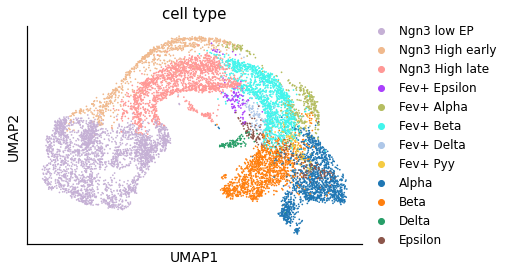

In [21]:
sc.pl.umap(adata, color=["cell_type"], title="cell type")

/home/icb/dominik.klein/mambaforge/envs/moscot_up/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:1207: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(values):
/home/icb/dominik.klein/mambaforge/envs/moscot_up/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:1216: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/home/icb/dominik.klein/mambaforge/envs/moscot_up/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


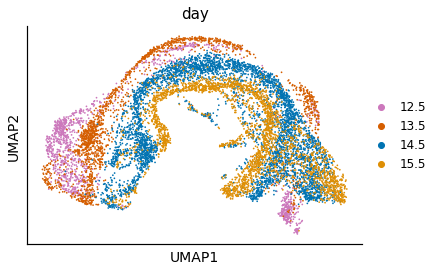

In [22]:
sc.pl.umap(adata, color=["day"])

/home/icb/dominik.klein/mambaforge/envs/moscot_up/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:1207: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(values):


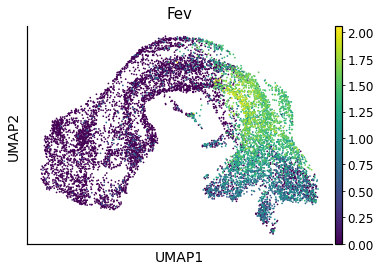

In [23]:
sc.pl.umap(adata, color=["Fev"])

/home/icb/dominik.klein/mambaforge/envs/moscot_up/lib/python3.11/site-packages/scanpy/plotting/_anndata.py:770: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(adata.obs[groupby]):
/home/icb/dominik.klein/mambaforge/envs/moscot_up/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/icb/dominik.klein/mambaforge/envs/moscot_up/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/home/icb/dominik.klein/

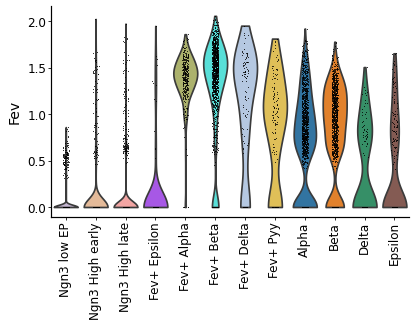

In [24]:
sc.pl.violin(adata, ["Fev"], groupby="cell_type", rotation=90)

In [25]:
x,y = 'day', 'cell_type'
df = adata.obs.copy()
df1 = df.groupby(x)[y].value_counts(normalize=True)
df1 = df1.mul(100)
df1 = df1.rename('percent').reset_index()

/tmp/ipykernel_2304636/2099076063.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df1 = df.groupby(x)[y].value_counts(normalize=True)


/home/icb/dominik.klein/mambaforge/envs/moscot_up/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/icb/dominik.klein/mambaforge/envs/moscot_up/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/home/icb/dominik.klein/mambaforge/envs/moscot_up/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/icb/dominik.klein/mambaforge

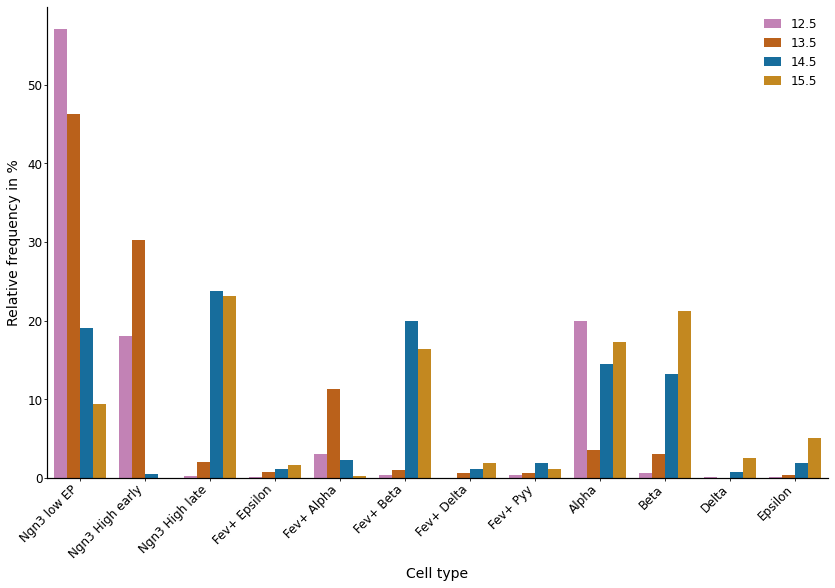

In [26]:
import seaborn as sns
g = sns.catplot(x="cell_type",y='percent',hue=x,kind='bar',data=df1, legend=False,height=8.27, aspect=11.7/8.27, palette=color_dict_day)
plt.xlabel("Cell type")
plt.ylabel("Relative frequency in %")
plt.xticks(rotation=45, ha='right')
plt.legend(loc='upper right')
plt.tight_layout()

In [27]:
x,y = 'day', 'cell_type'
df2 = adata.obs.copy()
df2 = df2.groupby(x)[y].value_counts(normalize=False)
df2 = df2.rename('counts').reset_index()

/tmp/ipykernel_2304636/1901326194.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df2 = df2.groupby(x)[y].value_counts(normalize=False)


/home/icb/dominik.klein/mambaforge/envs/moscot_up/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/icb/dominik.klein/mambaforge/envs/moscot_up/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/home/icb/dominik.klein/mambaforge/envs/moscot_up/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/icb/dominik.klein/mambaforge

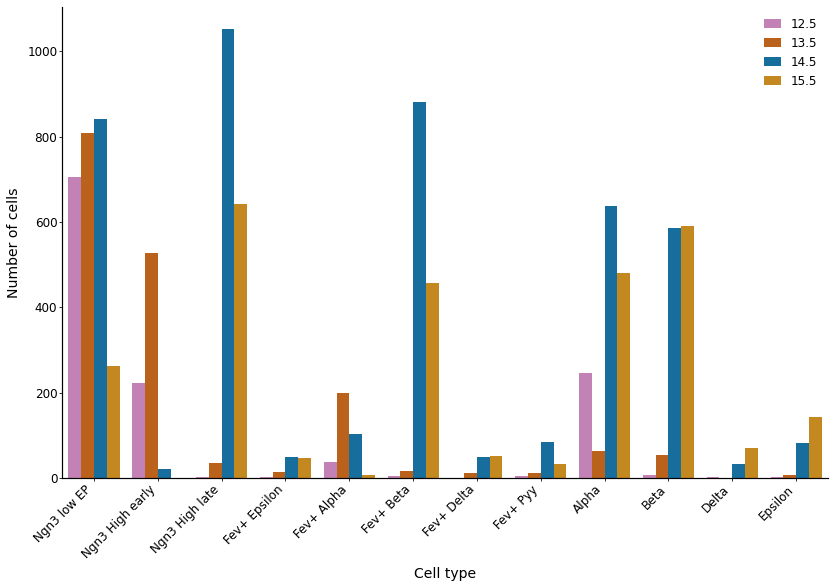

In [28]:

g = sns.catplot(x="cell_type",y='counts',hue=x,kind='bar',data=df2, legend=False,height=8.27, aspect=11.7/8.27, palette=color_dict_day)
plt.xlabel("Cell type")
plt.ylabel("Number of cells")
plt.xticks(rotation=45, ha='right')
plt.legend(loc='upper right')
plt.tight_layout()

In [29]:
adata = adata[adata.obs["day"].isin([13.5, 14.5])].copy()

/home/icb/dominik.klein/mambaforge/envs/moscot_up/lib/python3.11/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):


In [30]:
tp = TemporalProblem(adata)

In [31]:
tp = tp.prepare("day", joint_attr="X_pca")

/home/icb/dominik.klein/git_repos/moscot/src/moscot/problems/time/_mixins.py:986: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not (is_categorical_dtype(col) and is_numeric_dtype(col.cat.categories)):


In [32]:


dfs = {}
batch_column = "day"
unique_batches = [13.5, 14.5]
for i in range(len(unique_batches) - 1):
    batch1 = unique_batches[i]
    batch2 = unique_batches[i + 1]

    indices = np.where((adata.obs[batch_column] == batch1) | (adata.obs[batch_column] == batch2))[0]
    adata_subset = adata[indices]
    sc.pp.neighbors(adata_subset, use_rep="X_pca")
    dfs[(batch1, batch2)] = (
        pd.DataFrame(
            index=adata_subset.obs_names,
            columns=adata_subset.obs_names,
            data=adata_subset.obsp["connectivities"].A.astype("float64")
        )
    )

In [33]:
tp[13.5, 14.5].set_graph_xy(dfs[13.5, 14.5], t=100)

/home/icb/dominik.klein/mambaforge/envs/moscot_up/lib/python3.11/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):


In [34]:
tp.solve(max_iterations=1e7)

INFO     Solving `1` problems                                                                                      
INFO     Solving problem BirthDeathProblem[stage='prepared', shape=(1745, 4417)].                                  


/home/icb/dominik.klein/mambaforge/envs/moscot_up/lib/python3.11/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):


TemporalProblem[(13.5, 14.5)]

In [35]:
_ = tp.cell_transition(13.5, 14.5, {"cell_type": order_celltypes}, {"cell_type": order_celltypes}, forward=False)

/home/icb/dominik.klein/mambaforge/envs/moscot_up/lib/python3.11/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):
/home/icb/dominik.klein/mambaforge/envs/moscot_up/lib/python3.11/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):
/home/icb/dominik.klein/mambaforge/envs/moscot_up/lib/python3.11/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):
/home/icb/dominik.klein/mambaforge/envs/moscot_up/lib/python3.11/site-packages/anndata/_core/anndata.py:1113: FutureWarning:

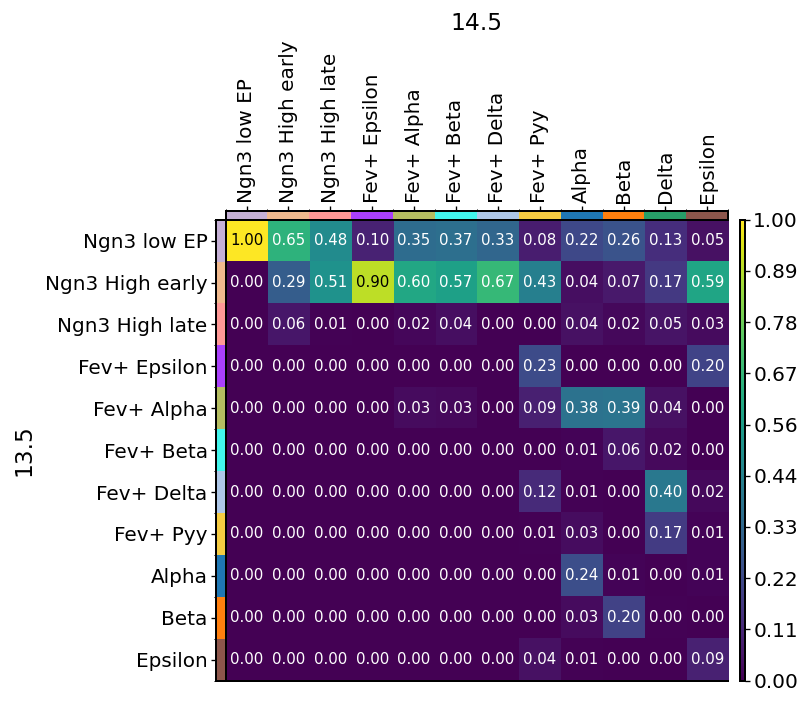

In [36]:
mpl.cell_transition(tp, dpi=120, fontsize=9, save=os.path.join(output_dir, "13_14_backward_transitions.png"))

In [37]:
sc.pp.neighbors(adata)
sc.tl.umap(adata)

/home/icb/dominik.klein/mambaforge/envs/moscot_up/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:1207: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(values):
/home/icb/dominik.klein/mambaforge/envs/moscot_up/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:1216: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/home/icb/dominik.klein/mambaforge/envs/moscot_up/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


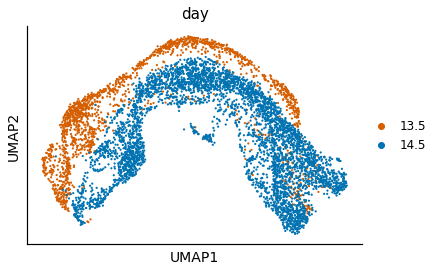

In [38]:
sc.pl.umap(adata, color=["day"])

/home/icb/dominik.klein/mambaforge/envs/moscot_up/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:1207: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(values):
/home/icb/dominik.klein/mambaforge/envs/moscot_up/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:1216: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/home/icb/dominik.klein/mambaforge/envs/moscot_up/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


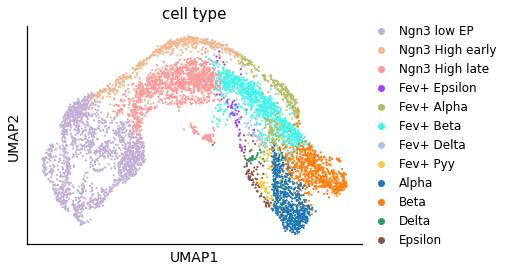

In [39]:
sc.pl.umap(adata, color=["cell_type"], title="cell type")

In [40]:
tp.pull(13.5, 14.5, data="cell_type", subset="Epsilon")

/home/icb/dominik.klein/mambaforge/envs/moscot_up/lib/python3.11/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):
/home/icb/dominik.klein/mambaforge/envs/moscot_up/lib/python3.11/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):


/home/icb/dominik.klein/git_repos/moscot/src/moscot/plotting/_utils.py:525: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(adata.obs[obs_col]):
/home/icb/dominik.klein/mambaforge/envs/moscot_up/lib/python3.11/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):
/home/icb/dominik.klein/mambaforge/envs/moscot_up/lib/python3.11/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):
/home/icb/dominik.klein/git_repos/moscot/src/moscot/plotting/_utils.py:483: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

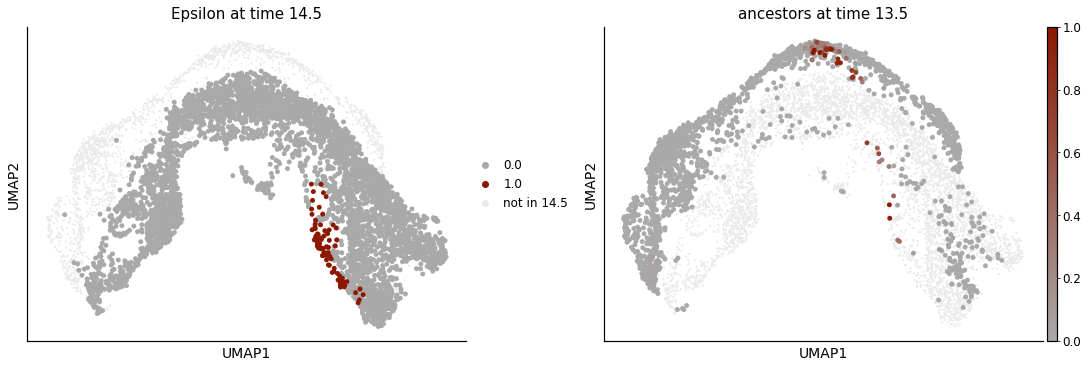

In [41]:
mpl.pull(tp, time_points=[13.5, 14.5], figsize=(15,5), dot_scale_factor=5.0, scale=True)

In [42]:
tp.pull(13.5, 14.5, data="cell_type", subset="Fev+ Epsilon")

/home/icb/dominik.klein/mambaforge/envs/moscot_up/lib/python3.11/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):
/home/icb/dominik.klein/mambaforge/envs/moscot_up/lib/python3.11/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):


/home/icb/dominik.klein/git_repos/moscot/src/moscot/plotting/_utils.py:525: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(adata.obs[obs_col]):
/home/icb/dominik.klein/mambaforge/envs/moscot_up/lib/python3.11/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):
/home/icb/dominik.klein/git_repos/moscot/src/moscot/plotting/_utils.py:483: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  size = size[indices]
/home/icb/dominik.klein/mambaforge/envs/moscot_up/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterpl

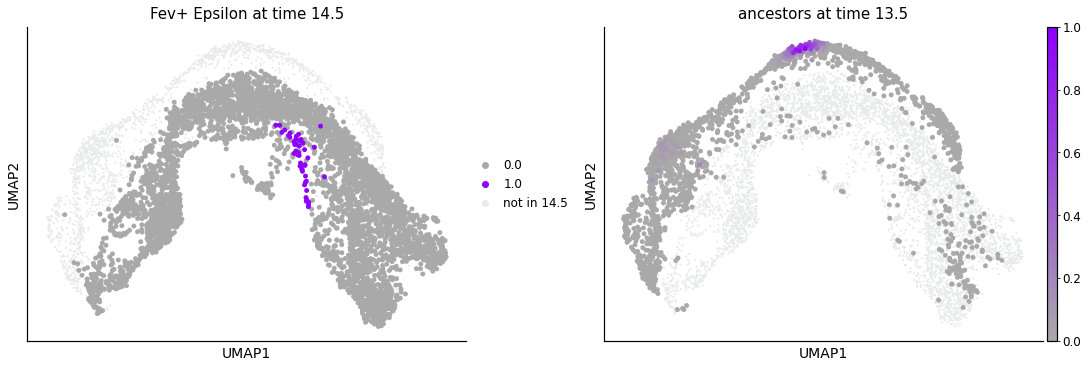

In [43]:
mpl.pull(tp, time_points=[13.5, 14.5], figsize=(15,5), dot_scale_factor=5.0, scale=True)

In [44]:
tp.pull(13.5, 14.5, data="cell_type", subset="Fev+ Delta")

/home/icb/dominik.klein/mambaforge/envs/moscot_up/lib/python3.11/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):
/home/icb/dominik.klein/mambaforge/envs/moscot_up/lib/python3.11/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):


/home/icb/dominik.klein/git_repos/moscot/src/moscot/plotting/_utils.py:525: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(adata.obs[obs_col]):
/home/icb/dominik.klein/mambaforge/envs/moscot_up/lib/python3.11/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):
/home/icb/dominik.klein/git_repos/moscot/src/moscot/plotting/_utils.py:483: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  size = size[indices]
/home/icb/dominik.klein/mambaforge/envs/moscot_up/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterpl

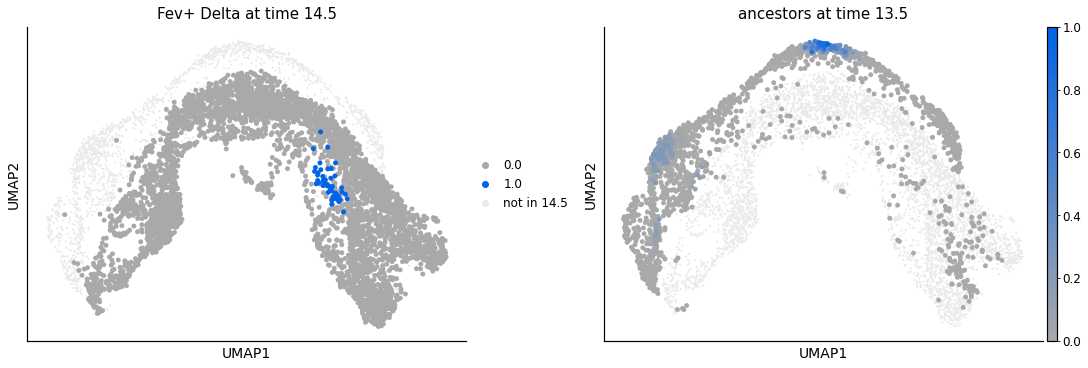

In [45]:
mpl.pull(tp, time_points=[13.5, 14.5], figsize=(15,5), dot_scale_factor=5.0, scale=True)

In [46]:
tp.pull(13.5, 14.5, data="cell_type", subset="Delta")

/home/icb/dominik.klein/mambaforge/envs/moscot_up/lib/python3.11/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):
/home/icb/dominik.klein/mambaforge/envs/moscot_up/lib/python3.11/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):


/home/icb/dominik.klein/git_repos/moscot/src/moscot/plotting/_utils.py:525: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(adata.obs[obs_col]):
/home/icb/dominik.klein/mambaforge/envs/moscot_up/lib/python3.11/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):
/home/icb/dominik.klein/git_repos/moscot/src/moscot/plotting/_utils.py:483: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  size = size[indices]
/home/icb/dominik.klein/mambaforge/envs/moscot_up/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterpl

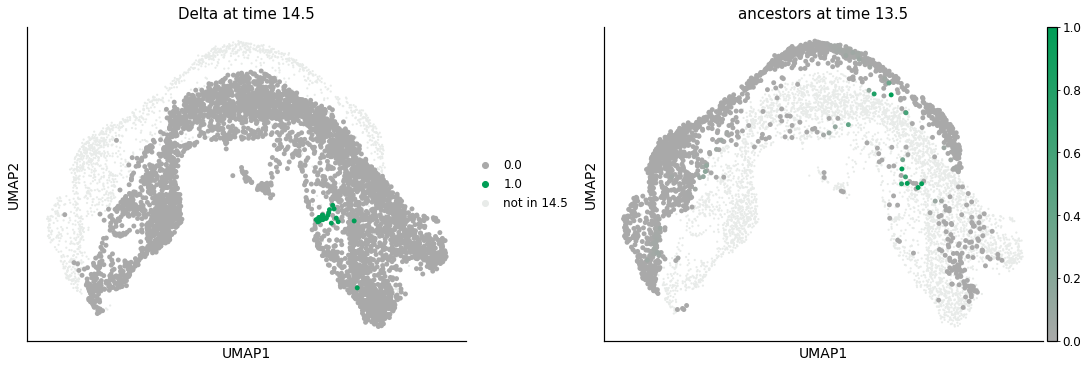

In [47]:
mpl.pull(tp, time_points=[13.5, 14.5], figsize=(15,5), dot_scale_factor=5.0, scale=True)